### Forest Type Mapping via SVM

### Attribute Information:

1. Class: 's' ('Sugi' forest), 'h' ('Hinoki' forest), 'd' ('Mixed deciduous' forest), 'o' ('Other' non-forest land)
2. b1 - b9: ASTER image bands containing spectral information in the green, red, and near infrared wavelengths for three dates (Sept. 26, 2010; March 19, 2011; May 08, 2011.
3. pred_minus_obs_S_b1 - pred_minus_obs_S_b9: Predicted spectral values (based on spatial interpolation) minus actual spectral values for the 's' class (b1-b9).
4. pred_minus_obs_H_b1 - pred_minus_obs_H_b9: Predicted spectral values (based on spatial interpolation) minus actual spectral values for the 'h' class (b1-b9).

### Importing Libraries

In [1]:
# Data Processing
import pandas as pd

# Linear Algebra
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Algorithm
from sklearn.svm import SVC, LinearSVC

In [12]:
pd.set_option("display.max_columns", 30)

In [94]:
train_data= pd.read_csv("C:/Users/bhave/01. Supervised Learning/pandas_for_everyone-master/data/ForestTypes/training.csv")
test_data= pd.read_csv("C:/Users/bhave/01. Supervised Learning/pandas_for_everyone-master/data/ForestTypes/testing.csv")

In [95]:
train_data.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,pred_minus_obs_H_b2,pred_minus_obs_H_b3,pred_minus_obs_H_b4,pred_minus_obs_H_b5,pred_minus_obs_H_b6,pred_minus_obs_H_b7,pred_minus_obs_H_b8,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,75.70,14.86,40.35,7.97,-32.92,-38.92,-14.94,4.47,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,30.58,20.42,39.83,-16.74,-24.92,-36.33,-15.67,8.16,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,63.20,26.70,49.28,3.25,-24.89,-30.38,-3.60,4.15,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,55.54,24.50,47.90,-6.20,-20.98,-30.28,-5.03,7.77,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,59.44,2.62,32.02,-1.33,-37.99,-43.57,-34.25,1.83,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


In [96]:
test_data.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,pred_minus_obs_H_b2,pred_minus_obs_H_b3,pred_minus_obs_H_b4,pred_minus_obs_H_b5,pred_minus_obs_H_b6,pred_minus_obs_H_b7,pred_minus_obs_H_b8,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,67,51,68,115,69,111,136,31,67,47.70,-0.27,29.16,-16.32,-42.93,-49.01,-58.09,0.71,-9.17,-18.27,-1.80,-6.32,-20.88,-1.63,-6.13,-22.56,-5.53,-8.11
1,s,67,28,51,99,50,97,82,26,59,47.93,23.77,47.98,1.76,-23.88,-34.41,-2.89,4.32,-2.25,-20.13,-2.11,-6.35,-21.94,-1.22,-6.13,-22.20,-3.41,-6.57
2,s,63,26,50,95,49,91,81,26,57,53.09,25.72,48.33,7.16,-22.89,-28.40,-0.69,4.16,-0.44,-17.64,-1.81,-4.70,-19.39,-0.65,-5.01,-20.89,-3.96,-6.85
3,d,63,42,63,97,66,108,111,28,59,52.41,9.76,35.69,4.44,-39.89,-45.42,-31.33,2.24,-2.34,-20.20,-1.89,-5.47,-21.65,-0.99,-5.71,-22.19,-3.41,-6.52
4,s,46,27,50,83,51,90,76,26,56,68.54,24.27,48.21,16.37,-24.89,-27.66,2.19,4.93,1.25,-18.62,-2.17,-7.11,-21.12,-1.56,-6.35,-22.19,-4.45,-7.32


In [97]:
forest_data= pd.concat([train_data, test_data], ignore_index= True)
forest_data.head(5)

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,pred_minus_obs_H_b2,pred_minus_obs_H_b3,pred_minus_obs_H_b4,pred_minus_obs_H_b5,pred_minus_obs_H_b6,pred_minus_obs_H_b7,pred_minus_obs_H_b8,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,75.70,14.86,40.35,7.97,-32.92,-38.92,-14.94,4.47,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,30.58,20.42,39.83,-16.74,-24.92,-36.33,-15.67,8.16,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,63.20,26.70,49.28,3.25,-24.89,-30.38,-3.60,4.15,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,55.54,24.50,47.90,-6.20,-20.98,-30.28,-5.03,7.77,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,59.44,2.62,32.02,-1.33,-37.99,-43.57,-34.25,1.83,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


In [98]:
train_data.shape

(198, 28)

In [99]:
test_data.shape

(325, 28)

In [100]:
forest_data.shape

(523, 28)

In [101]:
temp_df= forest_data.pop('class')
forest_data['class']= temp_df
forest_data.head()

,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,pred_minus_obs_H_b2,pred_minus_obs_H_b3,pred_minus_obs_H_b4,pred_minus_obs_H_b5,pred_minus_obs_H_b6,pred_minus_obs_H_b7,pred_minus_obs_H_b8,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9,class
0,39,36,57,91,59,101,93,27,60,75.70,14.86,40.35,7.97,-32.92,-38.92,-14.94,4.47,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86,d
1,84,30,57,112,51,98,92,26,62,30.58,20.42,39.83,-16.74,-24.92,-36.33,-15.67,8.16,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83,h
2,53,25,49,99,51,93,84,26,58,63.20,26.70,49.28,3.25,-24.89,-30.38,-3.60,4.15,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07,s
3,59,26,49,103,47,92,82,25,56,55.54,24.50,47.90,-6.20,-20.98,-30.28,-5.03,7.77,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81,s
4,57,49,66,103,64,106,114,28,59,59.44,2.62,32.02,-1.33,-37.99,-43.57,-34.25,1.83,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84,d


In [102]:
forest_data['class']= forest_data['class'].astype('category')
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 28 columns):
b1                     523 non-null int64
b2                     523 non-null int64
b3                     523 non-null int64
b4                     523 non-null int64
b5                     523 non-null int64
b6                     523 non-null int64
b7                     523 non-null int64
b8                     523 non-null int64
b9                     523 non-null int64
pred_minus_obs_H_b1    523 non-null float64
pred_minus_obs_H_b2    523 non-null float64
pred_minus_obs_H_b3    523 non-null float64
pred_minus_obs_H_b4    523 non-null float64
pred_minus_obs_H_b5    523 non-null float64
pred_minus_obs_H_b6    523 non-null float64
pred_minus_obs_H_b7    523 non-null float64
pred_minus_obs_H_b8    523 non-null float64
pred_minus_obs_H_b9    523 non-null float64
pred_minus_obs_S_b1    523 non-null float64
pred_minus_obs_S_b2    523 non-null float64
pred_minus_obs_S_b3    523 non-nu

In [103]:
forest_data['class'].unique()

[d, h, s, o]
Categories (4, object): [d, h, s, o]

In [104]:
def object_mapping(x):
    if x== 's ':
        return 1
    elif x== 'h ':
        return 2
    elif x== 'd ':
        return 3
    elif x== 'o ':
        return 4

In [105]:
forest_data['Class']= forest_data['class'].apply(object_mapping)

In [130]:
forest_data= forest_data.drop(['class'], axis=1)

In [106]:
forest_data.describe()

,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,pred_minus_obs_H_b2,pred_minus_obs_H_b3,pred_minus_obs_H_b4,pred_minus_obs_H_b5,pred_minus_obs_H_b6,pred_minus_obs_H_b7,pred_minus_obs_H_b8,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
count,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000
mean,59.887189,39.380497,62.304015,98.156788,58.338432,99.747610,87.657744,27.873805,59.726577,53.906004,11.567782,34.060000,-0.276138,-33.011644,-39.494895,-10.995258,1.843002,-4.194283,-20.017304,-1.056195,-4.368203,-21.411568,-0.977514,-4.619809,-18.937228,-1.652199,-4.201377
std,12.345004,15.930120,15.937658,12.881210,11.336637,10.151598,16.398751,8.076700,9.291151,12.754964,16.311623,16.746541,13.222536,11.277147,9.951563,16.476999,8.159354,9.306667,3.806830,1.375642,2.053012,4.901451,0.495208,1.352096,4.147427,1.371180,1.518350
min,31.000000,23.000000,47.000000,54.000000,43.000000,83.000000,42.000000,19.000000,45.000000,4.950000,-112.600000,-106.120000,-77.010000,-74.560000,-77.170000,-62.740000,-54.740000,-58.280000,-32.950000,-8.800000,-11.210000,-40.370000,-3.270000,-8.730000,-34.140000,-8.870000,-10.830000
25%,51.500000,28.000000,52.000000,90.000000,50.000000,93.000000,76.000000,24.000000,54.500000,45.565000,3.190000,28.050000,-8.635000,-38.470000,-43.725000,-21.845000,2.535000,-5.025000,-22.505000,-1.795000,-5.625000,-24.175000,-1.210000,-5.525000,-21.820000,-2.370000,-4.940000
50%,58.000000,32.000000,56.000000,96.000000,55.000000,97.000000,88.000000,25.000000,57.000000,55.410000,18.860000,39.830000,1.760000,-28.950000,-36.520000,-11.540000,4.300000,-1.880000,-19.990000,-1.030000,-4.460000,-20.830000,-0.980000,-4.640000,-19.050000,-1.580000,-4.130000
75%,67.000000,48.000000,67.000000,107.000000,64.000000,104.000000,99.000000,27.000000,60.000000,62.340000,22.675000,44.620000,8.870000,-24.660000,-32.415000,0.400000,5.680000,0.915000,-18.080000,-0.300000,-2.840000,-18.735000,-0.730000,-3.810000,-16.610000,-0.915000,-3.245000
max,107.000000,160.000000,196.000000,172.000000,100.000000,138.000000,139.000000,84.000000,114.000000,86.080000,29.900000,57.550000,40.820000,-18.400000,-23.550000,34.660000,10.830000,9.580000,5.130000,12.460000,7.370000,1.880000,3.440000,3.940000,3.670000,8.840000,7.790000


In [123]:
# fig = plt.figure(figsize=(6,4))
# axes1 = fig.add_subplot(1, 1, 1)
# axes1.hist(forest_data['pred_minus_obs_H_b1'], bins=8)
# fig.show()

In [119]:
def plot_continuous_variable(x):
    hist, ax = plt.subplots(figsize=(6,4))
    ax = sns.distplot(forest_data[x])
    plt.show()

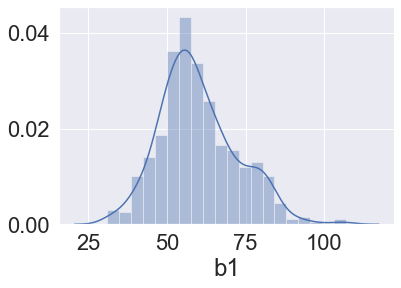

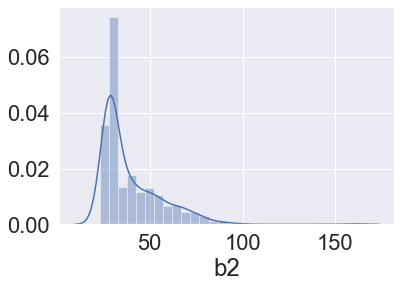

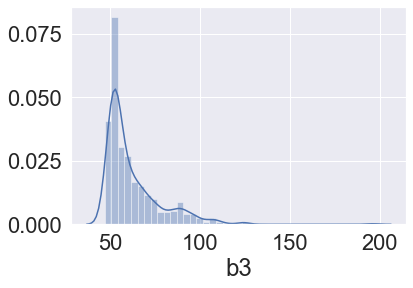

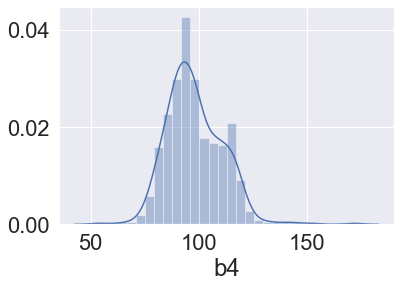

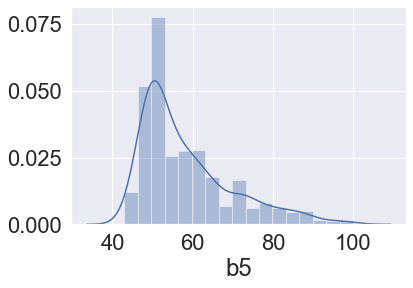

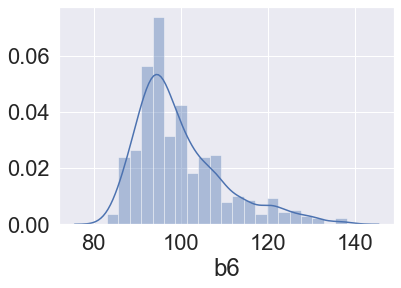

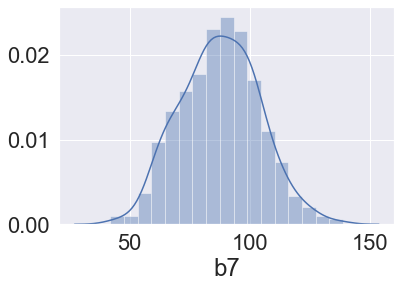

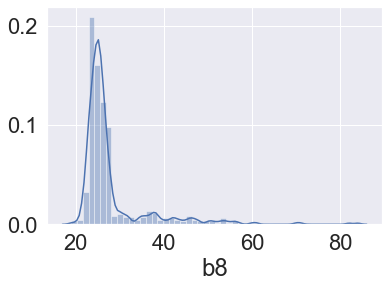

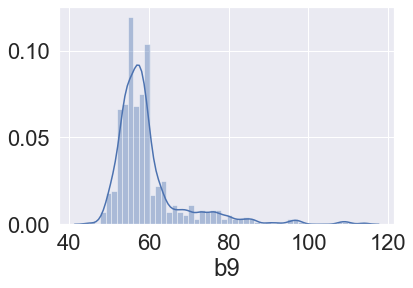

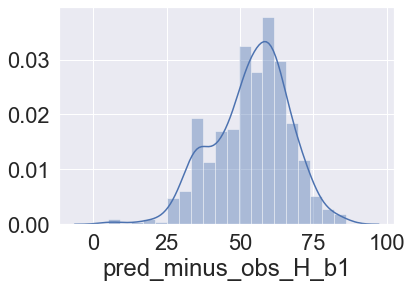

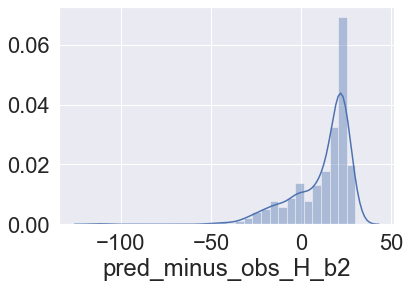

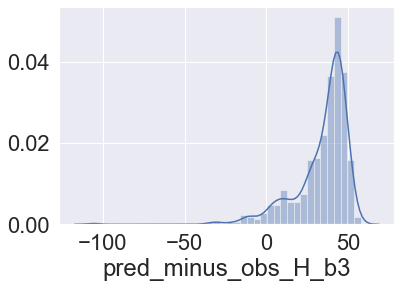

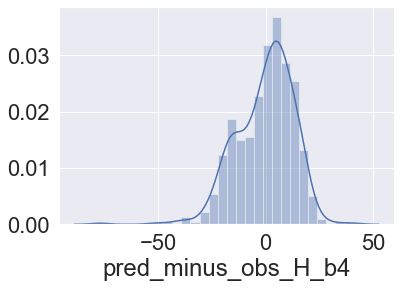

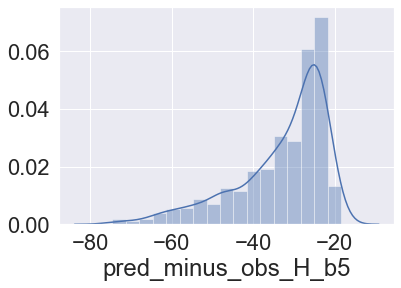

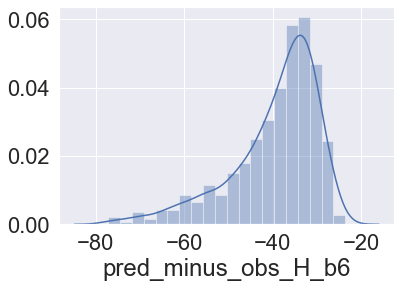

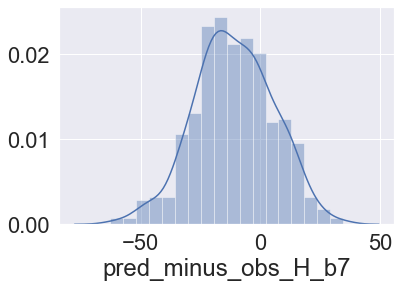

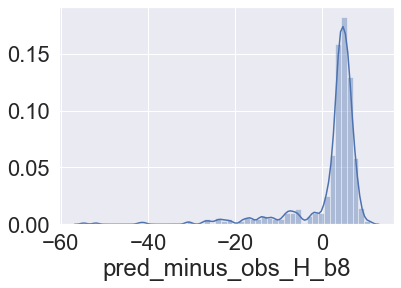

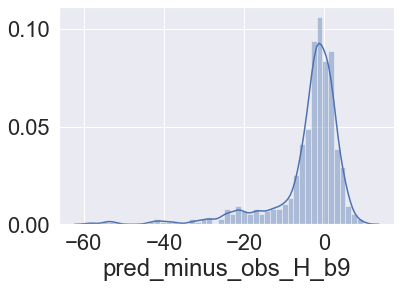

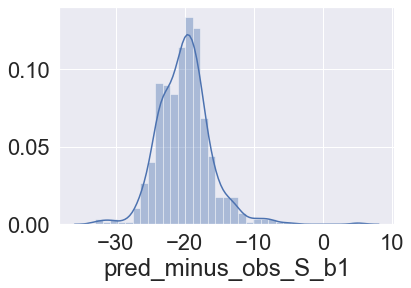

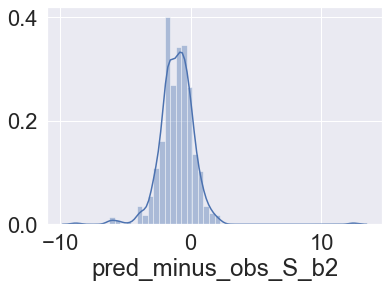

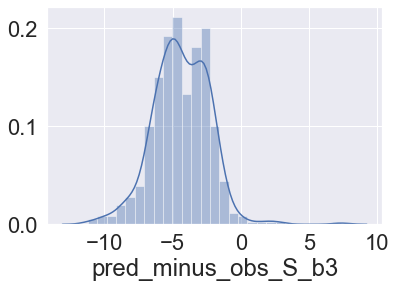

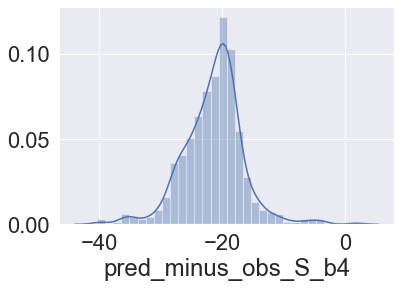

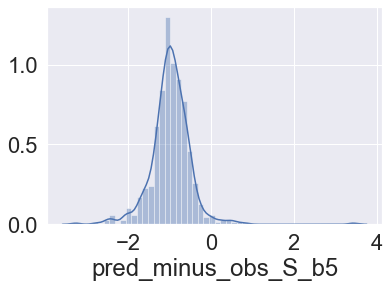

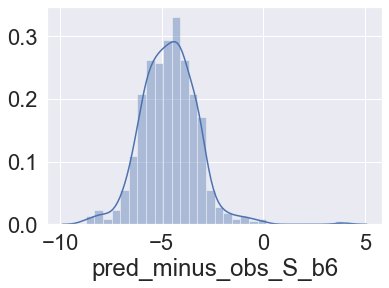

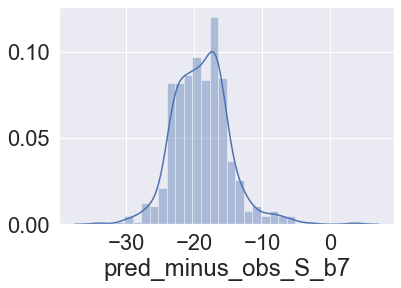

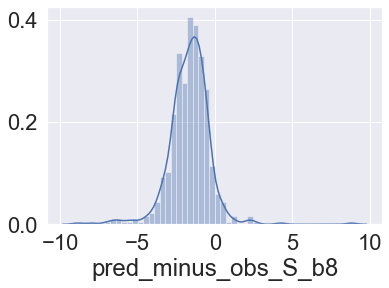

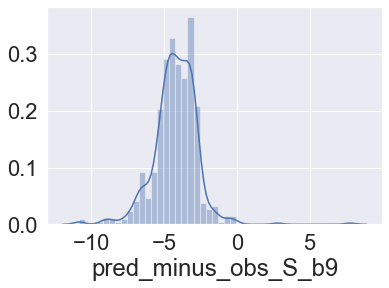

In [124]:
for col in forest_data.select_dtypes(["int64", "float64"]):
    plot_continuous_variable(col)

#### Inferences:
1. (Predicted spectral value)- (Actual spectral values) for most of 'h' class are right skewed.
2. (Predicted spectral value)- (Actual spectral values) for most of 's' class are close to normal distribution.

In [131]:
X= forest_data.iloc[:,:-1]
Y= pd.DataFrame(forest_data.iloc[:,-1])

In [133]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [134]:
vif= pd.DataFrame()
vif['vif factor']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features']= X.columns

In [136]:
vif.round(2)

,vif factor,features
0,5710.45,b1
1,13179.19,b2
2,17164.68,b3
3,5034.51,b4
4,415280.26,b5
5,308853.53,b6
6,12518.48,b7
7,23275.48,b8
8,57742.60,b9
9,4471.36,pred_minus_obs_H_b1


C:\Users\bhave\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


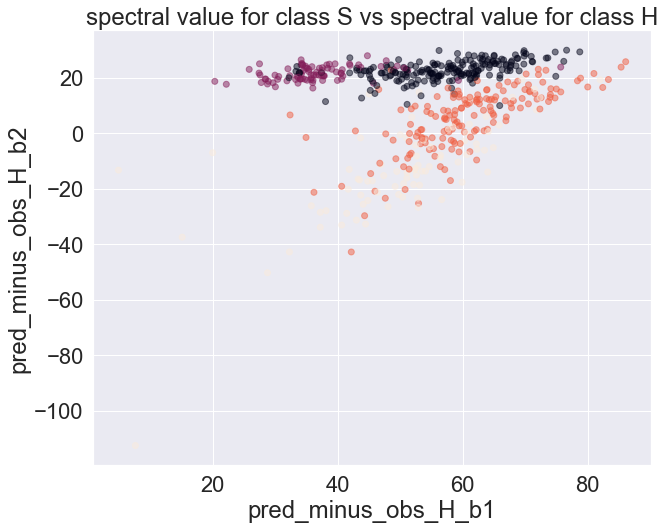

In [153]:
scatter_plot = plt.figure(figsize=(10,8))
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(
x= forest_data['pred_minus_obs_H_b1'], y=forest_data['pred_minus_obs_H_b2'], c=forest_data['Class'], alpha=0.5)
axes1.set_title('spectral value for class S vs spectral value for class H')
axes1.set_xlabel('pred_minus_obs_H_b1')
axes1.set_ylabel('pred_minus_obs_H_b2')
scatter_plot.show()

C:\Users\bhave\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


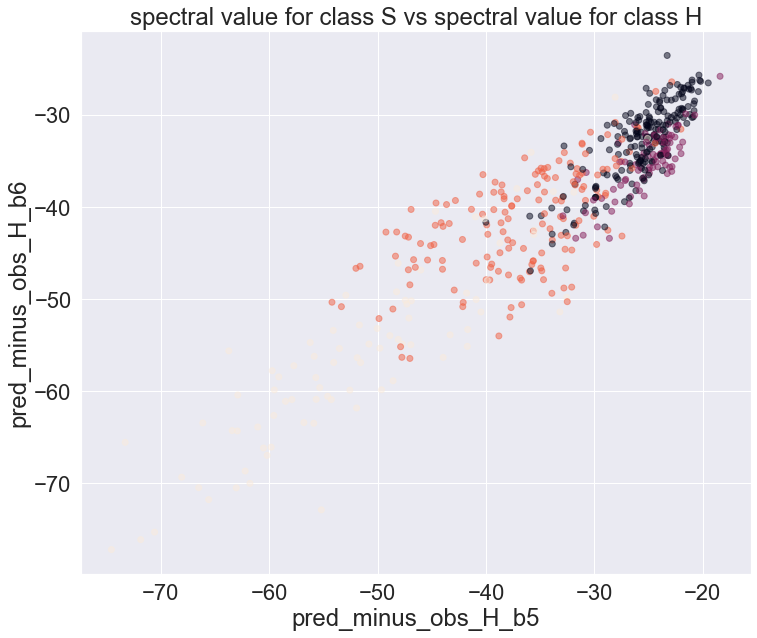

In [154]:
scatter_plot = plt.figure(figsize=(12,10))
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(
x= forest_data['pred_minus_obs_H_b5'], y=forest_data['pred_minus_obs_H_b6'], c=forest_data['Class'], alpha=0.5)
axes1.set_title('spectral value for class S vs spectral value for class H')
axes1.set_xlabel('pred_minus_obs_H_b5')
axes1.set_ylabel('pred_minus_obs_H_b6')
scatter_plot.show()

In [ ]:
scatter_plot = plt.figure(figsize=(12,10))
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(
x= forest_data['pred_minus_obs_S_b2'], y=forest_data['pred_minus_obs_H_b2'], c=forest_data['Class'], alpha=0.5)
axes1.set_title('spectral value for class S vs spectral value for class H')
axes1.set_xlabel('pred_minus_obs_S_b2')
axes1.set_ylabel('pred_minus_obs_H_b2')
scatter_plot.show()

C:\Users\bhave\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


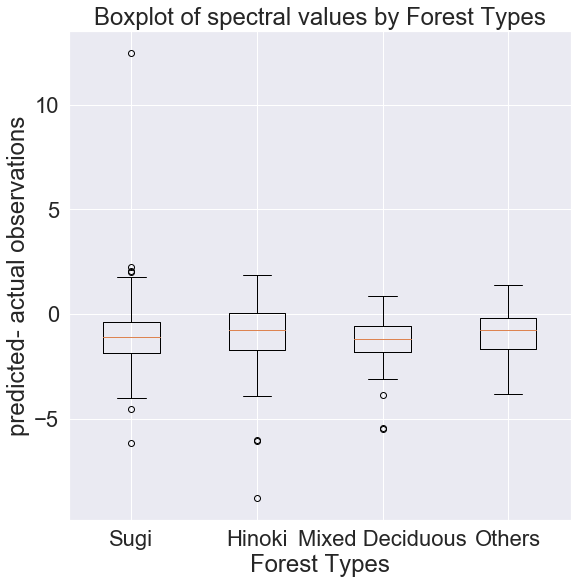

In [149]:
boxplot = plt.figure(figsize=(9,9))
axes1 = boxplot.add_subplot(1, 1, 1)
axes1.boxplot([forest_data[forest_data['Class'] == 1]['pred_minus_obs_S_b2'], 
               forest_data[forest_data['Class'] == 2]['pred_minus_obs_S_b2'],
              forest_data[forest_data['Class'] == 3]['pred_minus_obs_S_b2'],
              forest_data[forest_data['Class'] == 4]['pred_minus_obs_S_b2']],
              labels=['Sugi', 'Hinoki','Mixed Deciduous', 'Others'])
axes1.set_xlabel('Forest Types')
axes1.set_ylabel('predicted- actual observations')
axes1.set_title('Boxplot of spectral values by Forest Types')
boxplot.show()

C:\Users\bhave\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


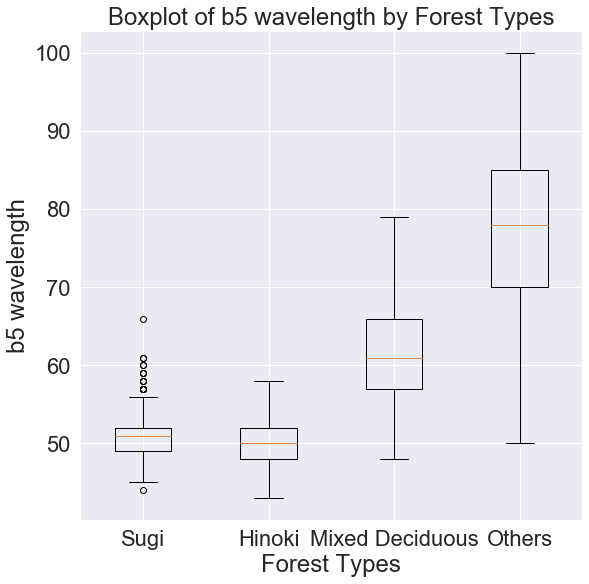

In [151]:
boxplot = plt.figure(figsize=(9,9))
axes1 = boxplot.add_subplot(1, 1, 1)
axes1.boxplot([forest_data[forest_data['Class'] == 1]['b5'], 
               forest_data[forest_data['Class'] == 2]['b5'],
              forest_data[forest_data['Class'] == 3]['b5'],
              forest_data[forest_data['Class'] == 4]['b5']],
              labels=['Sugi', 'Hinoki','Mixed Deciduous', 'Others'])
axes1.set_xlabel('Forest Types')
axes1.set_ylabel('b5 wavelength')
axes1.set_title('Boxplot of b5 wavelength by Forest Types')
boxplot.show()

### Q.6. Min-Max Scaling of features
Plot the graph showing the difference before scaling and after scaling

In [155]:
continuous_features= []
for features in forest_data.select_dtypes(["int64", "float64"]):
    continuous_features.append(features)

In [156]:
scaled_data= forest_data
from sklearn.preprocessing import MinMaxScaler
minmax= MinMaxScaler()
scaled_data[continuous_features]= minmax.fit_transform(scaled_data[continuous_features].values)

In [157]:
scaled_data.head()

,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,pred_minus_obs_H_b2,pred_minus_obs_H_b3,pred_minus_obs_H_b4,pred_minus_obs_H_b5,pred_minus_obs_H_b6,pred_minus_obs_H_b7,pred_minus_obs_H_b8,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9,Class
0,0.105263,0.094891,0.067114,0.313559,0.280702,0.327273,0.525773,0.123077,0.217391,0.872057,0.894456,0.894910,0.721209,0.741453,0.713353,0.490760,0.903004,0.824050,0.381828,0.325494,0.257266,0.457751,0.248882,0.201263,0.307855,0.207228,0.159506,3
1,0.697368,0.051095,0.067114,0.491525,0.140351,0.272727,0.515464,0.107692,0.246377,0.315913,0.933474,0.891733,0.511500,0.883903,0.761656,0.483265,0.959280,0.825523,0.438025,0.322201,0.266954,0.510769,0.190760,0.201263,0.283787,0.000000,0.000000,2
2,0.289474,0.014599,0.013423,0.381356,0.140351,0.181818,0.432990,0.107692,0.188406,0.717983,0.977544,0.949471,0.681151,0.884437,0.872622,0.607187,0.898124,0.837312,0.447216,0.329727,0.353606,0.535858,0.415797,0.318863,0.374769,0.269339,0.201933,1
3,0.368421,0.021898,0.013423,0.415254,0.070175,0.163636,0.412371,0.092308,0.159420,0.623567,0.962105,0.941040,0.600951,0.954060,0.874487,0.592505,0.953332,0.898320,0.503676,0.294920,0.262110,0.434083,0.138599,0.168114,0.186194,0.049689,0.001074,1
4,0.342105,0.189781,0.127517,0.415254,0.368421,0.418182,0.742268,0.138462,0.202899,0.671638,0.808561,0.844015,0.642281,0.651175,0.626632,0.292505,0.862742,0.815503,0.294380,0.336783,0.354682,0.393609,0.360656,0.254933,0.299127,0.346132,0.267991,3


C:\Users\bhave\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


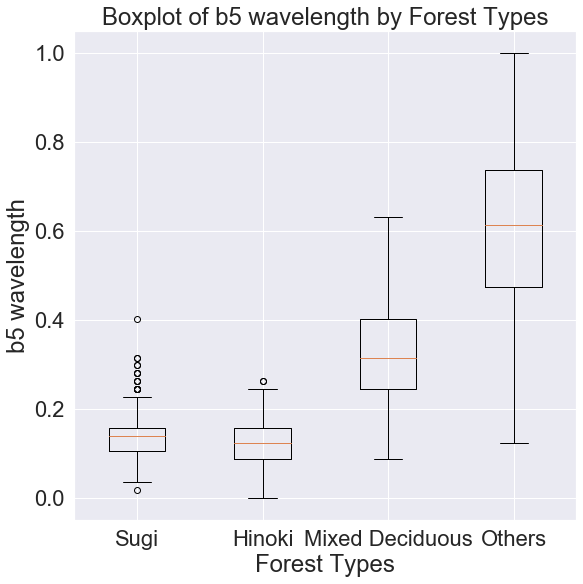

In [158]:
boxplot = plt.figure(figsize=(9,9))
axes1 = boxplot.add_subplot(1, 1, 1)
axes1.boxplot([scaled_data[scaled_data['Class'] == 1]['b5'], 
               scaled_data[scaled_data['Class'] == 2]['b5'],
              scaled_data[scaled_data['Class'] == 3]['b5'],
              scaled_data[scaled_data['Class'] == 4]['b5']],
              labels=['Sugi', 'Hinoki','Mixed Deciduous', 'Others'])
axes1.set_xlabel('Forest Types')
axes1.set_ylabel('b5 wavelength')
axes1.set_title('Boxplot of b5 wavelength by Forest Types')
boxplot.show()

C:\Users\bhave\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


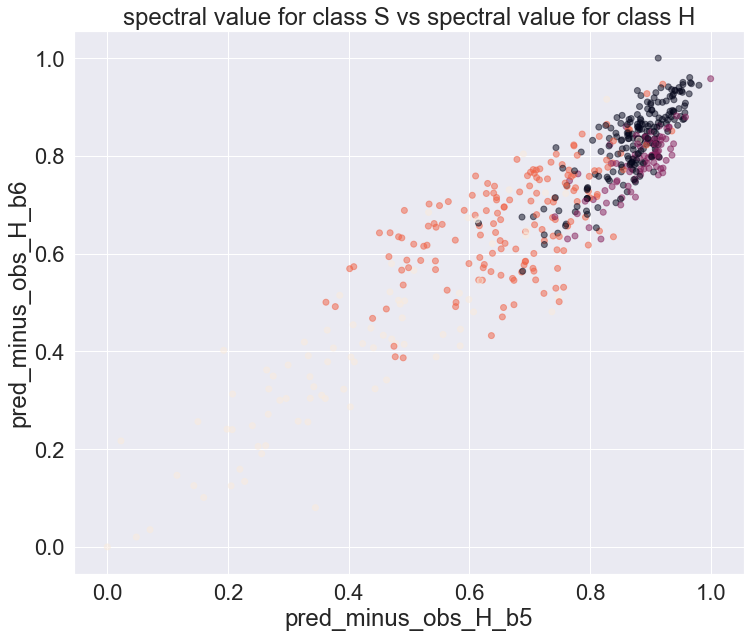

In [159]:
scatter_plot = plt.figure(figsize=(12,10))
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(
x= scaled_data['pred_minus_obs_H_b5'], y= scaled_data['pred_minus_obs_H_b6'], c=scaled_data['Class'], alpha=0.5)
axes1.set_title('spectral value for class S vs spectral value for class H')
axes1.set_xlabel('pred_minus_obs_H_b5')
axes1.set_ylabel('pred_minus_obs_H_b6')
scatter_plot.show()

In [171]:
from sklearn.decomposition import PCA
pca= PCA(n_components= 3)
X_reduced= pd.DataFrame(pca.fit_transform(X))
X_reduced.columns= ['f1', 'f2', 'f3']
X_reduced.head()

,f1,f2,f3
0,-11.535890,13.775470,-25.440576
1,-6.833182,-38.576242,18.823379
2,-34.470914,-0.904153,-2.910927
3,-34.184489,-10.987258,5.170102
4,23.685108,-14.042882,-27.855394


In [177]:
scaled_X= X_reduced
from sklearn.preprocessing import MinMaxScaler
minmax= MinMaxScaler()
scaled_X= pd.DataFrame(minmax.fit_transform(scaled_X))

In [178]:
scaled_X

,0,1,2
0,0.195165,0.570154,0.166764
1,0.210782,0.245453,0.511600
2,0.118999,0.479107,0.342280
3,0.119950,0.416568,0.405235
4,0.312131,0.397616,0.147952
...,...,...,...
518,0.346903,0.673693,0.315497
519,0.295580,0.447541,0.389781
520,0.101959,0.597553,0.487827
521,0.102793,0.616287,0.458545


In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X_reduced, Y, 
                                                   test_size= 0.3, random_state= 0)

In [180]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### SVM with default parameters

In [182]:
svc= SVC()
svc.fit(X_train, Y_train.values.ravel())
pred= svc.predict(X_test)
print("Accuracy score:", accuracy_score(Y_test, pred))

Accuracy score: 0.4012738853503185


#### Linear SVM

In [183]:
svc = SVC(kernel='linear')
svc.fit(X_train, Y_train.values.ravel())
pred_linear = svc.predict(X_test)
print("Accuracy Score :")
print(accuracy_score(Y_test, pred_linear))

Accuracy Score :
0.802547770700637


#### 'C' Parameter Tuning

In [185]:
from sklearn.model_selection import cross_val_score
C_range= list(np.arange(0.1,2,0.1))
accuracy_score= []
for c in C_range:
    svc= SVC(kernel= 'linear', C=c)
    scores= cross_val_score(svc, X, Y.values.ravel(), scoring= 'accuracy')
    accuracy_score.append(scores.mean())
print(accuracy_score)

[0.8678007156619874, 0.854467382328654, 0.8468263143407652, 0.8373025048169557, 0.829683457197908, 0.8258739333883843, 0.8258739333883843, 0.8239691714836224, 0.8201596476740985, 0.8201596476740985, 0.8182548857693366, 0.8182548857693366, 0.8220864299477016, 0.8220864299477016, 0.8201816680429398, 0.8201596476740985, 0.8220644095788604, 0.8201596476740985, 0.8182548857693366]


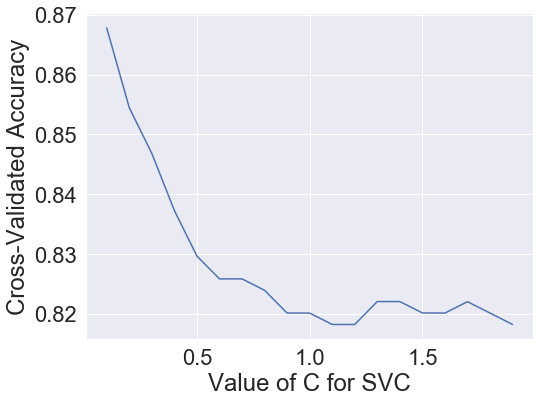

In [187]:
figure= plt.figure(figsize= (8,6))
axes= figure.add_subplot(1,1,1)
axes.plot(C_range, accuracy_score)
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### Q.9. Fine-tune the parameter in SVM by using GridSearchCV.

In [188]:
from sklearn.model_selection import GridSearchCV
Cs= [0.001, 0.01, 0.1, 1, 10]
gammas= [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search= GridSearchCV(SVC(kernel= 'linear'), param_grid= param_grid, cv=10, scoring= 'accuracy')
grid_search.fit(X_train, Y_train.values.ravel())

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [189]:
print(grid_search.best_params_)

{'C': 0.001, 'gamma': 0.001}


In [190]:
print(grid_search.best_estimator_)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [191]:
grid_prediction= grid_search.predict(X_test)

In [195]:
print(classification_report(Y_test, grid_prediction))

             precision    recall  f1-score   support

          1       0.88      0.88      0.88        59
          2       0.74      1.00      0.85        23
          3       0.75      0.79      0.77        48
          4       0.88      0.52      0.65        27

avg / total       0.82      0.81      0.80       157



In [197]:
from sklearn import metrics
print("Accuracy Score of SVM on Hyper-tuning : ",metrics.accuracy_score(Y_test, grid_prediction))

Accuracy Score of SVM on Hyper-tuning :  0.8089171974522293
